## Model Selection

In [1]:
import sklearn

# Tell iPython to include plots inline within the notebook (as opposed to a seperate window)
%matplotlib inline

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.1.


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.700427 (0.053159)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


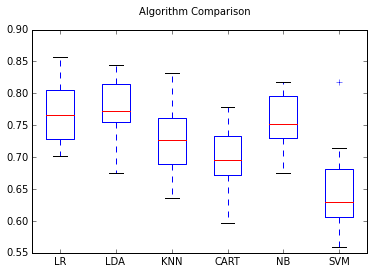

In [3]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load dataset
##url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
##names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
##dataframe = pandas.read_csv(url, names=names)
##array = dataframe.values
##X = array[:,0:8]
##Y = array[:,8]

df = pd.read_csv(symbol_to_path('SPY'), index_col='Date', 
            parse_dates=True, 
            usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], 
            na_values=['nan'])
    
# sort data chronologically
df = df.sort_index(ascending=True, axis=0)
    
# add new column to view Adj Close 5 days later
df['Adj_Close_5_Days_Later'] = df['Adj Close']
df['Adj_Close_5_Days_Later'] = df['Adj_Close_5_Days_Later'].shift(-5)
    
X_train = df.iloc[0:1000,:-1]
y_train = df.iloc[0:1000, -1]
X_test = df.iloc[1000:1253,:-1]
y_test = df.iloc[1000:1253, -1]

# prepare configuration for cross validation test harness
seed = 0

# prepare models
models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# ...








# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/Users/carldgosselin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/carldgosselin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


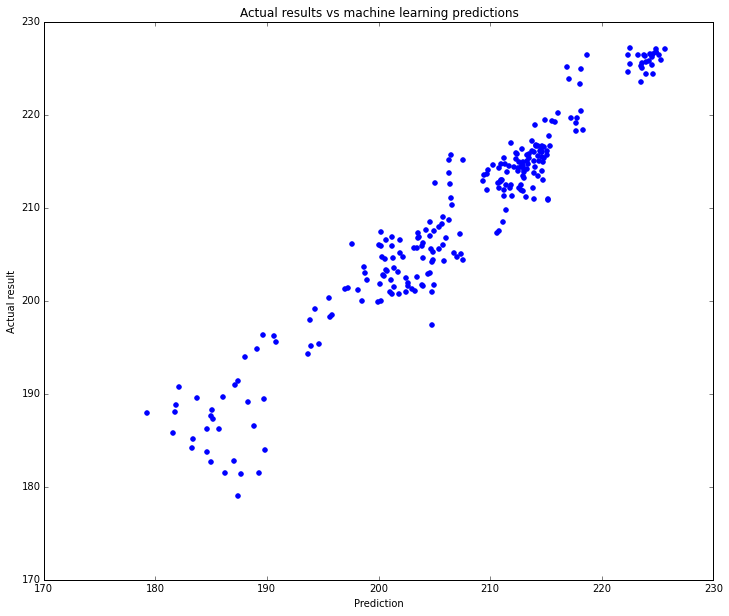

Score on training data
regr.score(X_train, y_train):  0.98923993807 

Score on testing (unseen) data
regr.score(X_test, y_test): 0.90
Mean squared error:  11.684727276 



last day of processing: 
Date
2017-01-12    226.529999
Name: Adj Close, dtype: float64 

Prediction for Friday Sept 23rd: 
[ 224.85990886] 

Actual close on Friday Sept 23rd: 
215.990005


In [2]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def plot_selected(df, columns, start_index, end_index):
    plot_data(df.ix[start_index:end_index,columns], title="Stock Data")
       
def plot_data(df, title):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

def show_supervised_linear_regression():
    
    df = pd.read_csv(symbol_to_path('SPY'), index_col='Date', 
                parse_dates=True, 
                usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], 
                na_values=['nan'])
    
    # sort data chronologically
    df = df.sort_index(ascending=True, axis=0)
    
    # add new column to view Adj Close 5 days later
    df['Adj_Close_5_Days_Later'] = df['Adj Close']
    df['Adj_Close_5_Days_Later'] = df['Adj_Close_5_Days_Later'].shift(-5)
    
    X_train = df.iloc[0:1000,:-1]
    y_train = df.iloc[0:1000, -1]
    X_test = df.iloc[1000:1253,:-1]
    y_test = df.iloc[1000:1253, -1]
    # X_test = df.iloc[1252:1253,:-1]
    # y_test = df.iloc[1252:1253, -1]
    
    
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    
    # Query
    regr.predict(X_test)
    
    # Plot outputs
    print "\n"
    plt.figure(figsize=(12,10))
    plt.title("Actual results vs machine learning predictions")
    plt.xlabel("Prediction")
    plt.ylabel("Actual result")
    plt.scatter(regr.predict(X_test), y_test, color='blue')
    plt.show()
    
    # Explained variance score: 1 is perfect
    # Score
    print "Score on training data"
    print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
    
    print "Score on testing (unseen) data"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    # The mean square error
    print "Mean squared error: ", mean_squared_error(y_test, regr.predict(X_test)), "\n"
    
    print "\n"
    print "last day of processing: "
    print X_test['Adj Close'].tail(1), "\n"
    print "Prediction for Friday Sept 23rd: "
    print regr.predict(X_test[-1:]), "\n"
    print "Actual close on Friday Sept 23rd: "
    print "215.990005"

if __name__ == "__main__":
    show_supervised_linear_regression()